In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GDP by country.xlsx to GDP by country.xlsx


In [ ]:
import pandas as pd

# Excel fájl beolvasása
df = pd.read_excel('GDP by country.xlsx', index_col=0)

# Az adatokat DataFrame-ként tároljuk, ahol az első oszlop az országok nevei, a többi oszlop pedig az évek GDP-adatai

# Ellenőrizzük az adatokat
print(df.head())


                 1990          1991          1992          1993          1994  \
Ország                                                                          
Albania    617.230436    336.586995    200.852220    367.279225    586.416135   
Andorra  19563.657472  19533.262067  20099.535221  15916.839516  15748.530750   
Austria  21596.068220  22323.131249  24782.711877  23987.203724  25546.246053   
Belarus   1706.640919   1805.455925   1658.086413   1589.510113   1460.007914   
Belgium  20600.375279  21041.660652  23372.619171  22283.936021  24208.554793   

                 1995          1996          1997          1998          1999  \
Ország                                                                          
Albania    750.604449   1009.977111    717.380048    813.789397   1033.242532   
Andorra  18443.254520  19130.159715  18247.999565  18536.508428  18875.288370   
Austria  30207.067431  29645.945125  26571.752363  27212.464291  27078.708161   
Belarus   1370.699914   145

Ez által az adatok rendezetebbek és könnyebben kezelhetőek. Ez a kódsor az eredeti táblázatot átalakítja hosszú formátumúvá, ahol minden ország-év pároshoz egy GDP érték tartozik külön sorban.

In [ ]:

df_melted = df.reset_index().melt(id_vars=['Ország'], var_name='Év', value_name='GDP')
print(df_melted.head())

    Ország    Év           GDP
0  Albania  1990    617.230436
1  Andorra  1990  19563.657472
2  Austria  1990  21596.068220
3  Belarus  1990   1706.640919
4  Belgium  1990  20600.375279


Ez a kód biztosítja, hogy az "Év" és a "GDP" oszlopokban csak számok legyenek, a hibás vagy nem szám jellegű értékeket pedig eltávolítja NaN-re cserélve.

In [ ]:
df_melted['Év'] = pd.to_numeric(df_melted['Év'], errors='coerce')
df_melted['GDP'] = pd.to_numeric(df_melted['GDP'], errors='coerce')
print(df_melted.head())

    Ország    Év           GDP
0  Albania  1990    617.230436
1  Andorra  1990  19563.657472
2  Austria  1990  21596.068220
3  Belarus  1990   1706.640919
4  Belgium  1990  20600.375279


A kód kiszűri a 2020-as év GDP-adatait, majd országonkénti bontásban egy színes oszlopdiagramon ábrázolja őket a GDP nagysága szerint.

<ipython-input-14-504c423e52e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gdp_ev, x='GDP', y='Ország', palette='Spectral')


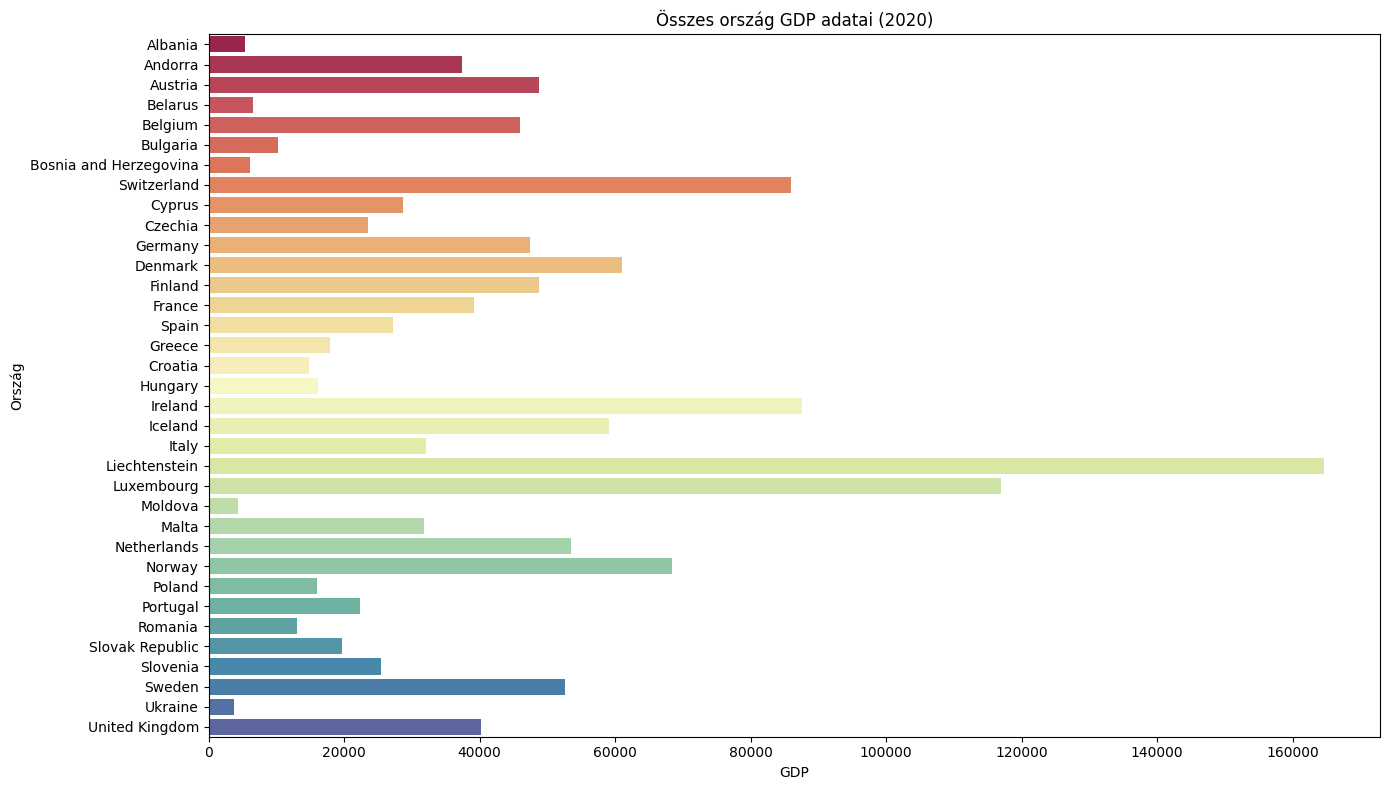

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ev = 2020
gdp_ev = df_melted[df_melted['Év'] == ev].dropna()

plt.figure(figsize=(14,8))
sns.barplot(data=gdp_ev, x='GDP', y='Ország', palette='Spectral')
plt.title(f'Összes ország GDP adatai ({ev})')
plt.xlabel('GDP')
plt.ylabel('Ország')
plt.tight_layout()
plt.show()

A kód megrajzolja, hogyan változott az összes ország GDP-je évről évre, külön vonallal minden országnak.

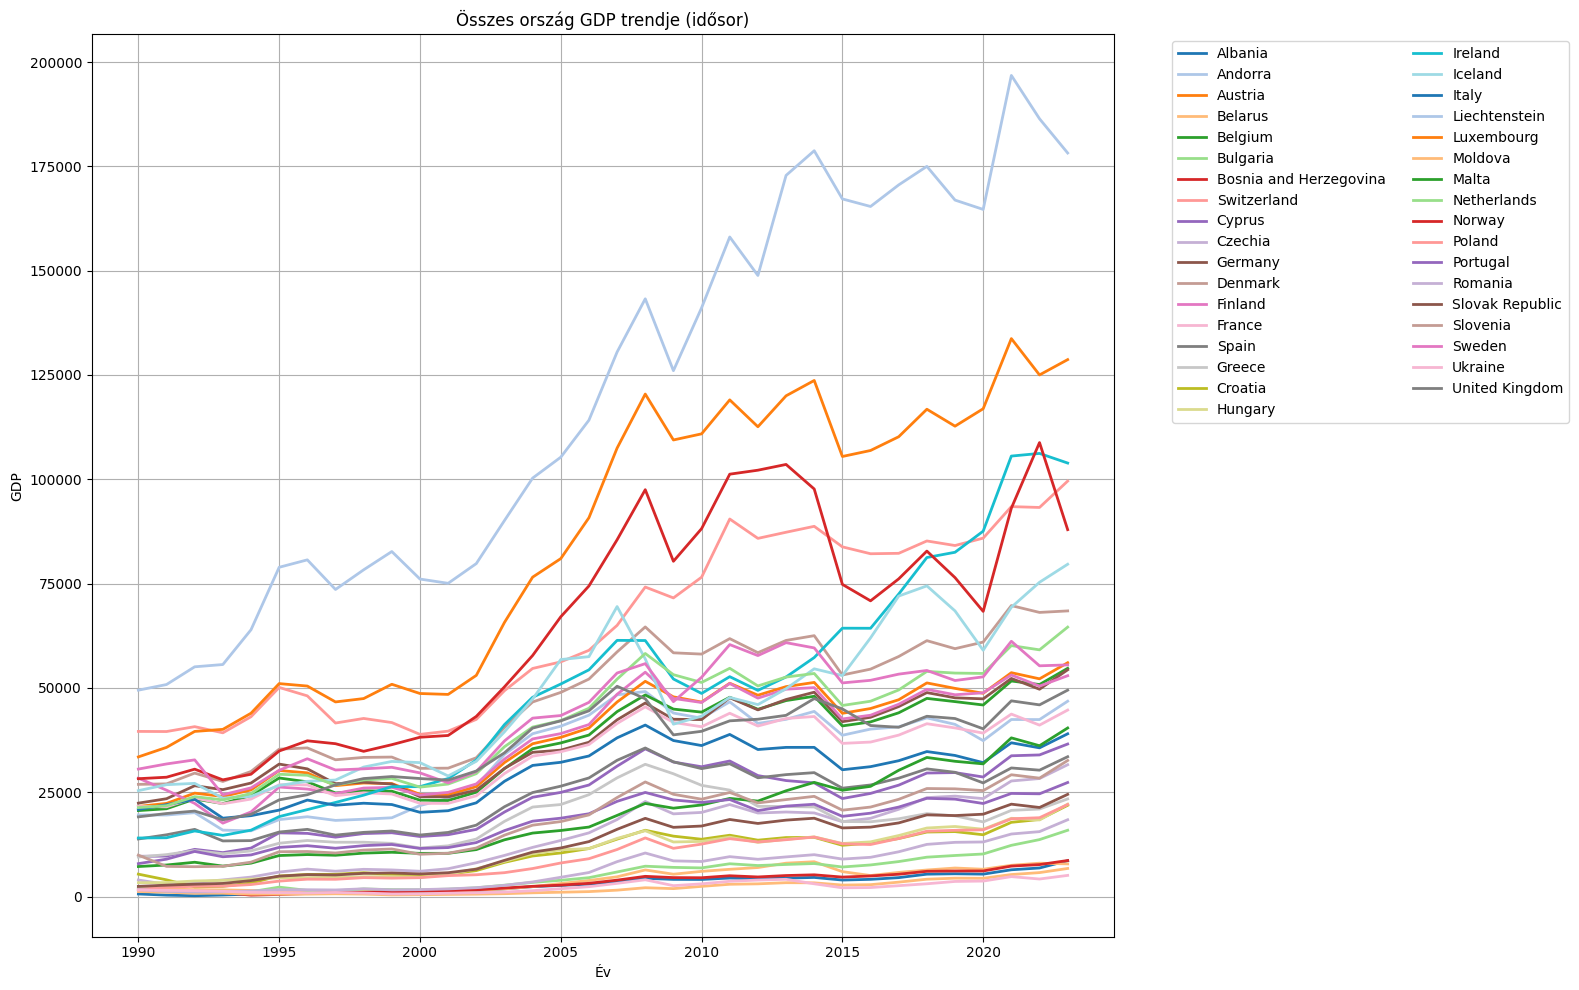

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.lineplot(data=df_melted, x='Év', y='GDP', hue='Ország', palette='tab20', lw=2)
plt.title('Összes ország GDP trendje (idősor)')
plt.xlabel('Év')
plt.ylabel('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2) # Legenda kívülre
plt.grid(True)
plt.tight_layout()
plt.show()


Ez a kódrészlet egy tortadiagramot készít a 2020-as év GDP megoszlásáról. Itt a top 10 ország GDP-jét mutatja, míg a maradék országok egy "Egyéb" kategóriában kerülnek összevonásra.

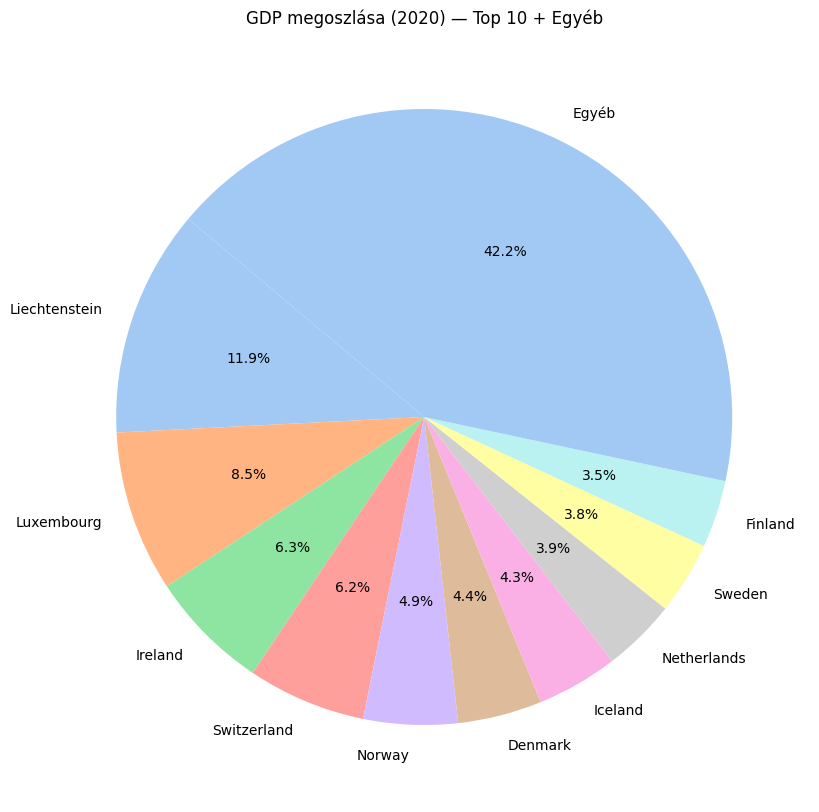

In [ ]:
ev = 2020
gdp_ev = df_melted[df_melted['Év'] == ev].dropna()

top10 = gdp_ev.sort_values('GDP', ascending=False).head(10)
egyeb = pd.DataFrame({
    'Ország': ['Egyéb'],
    'GDP': [gdp_ev['GDP'].sum() - top10['GDP'].sum()]
})

gdp_plot = pd.concat([top10, egyeb])

plt.figure(figsize=(10,10))
plt.pie(gdp_plot['GDP'], labels=gdp_plot['Ország'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title(f'GDP megoszlása ({ev}) — Top 10 + Egyéb')
plt.show()

Ez a kódrészlet a 2023-as év GDP eloszlását ábrázolja egy hisztogramon, sűrűségfüggvénnyel (KDE), amely megmutatja, hogy hány ország rendelkezik különböző GDP értékekkel.

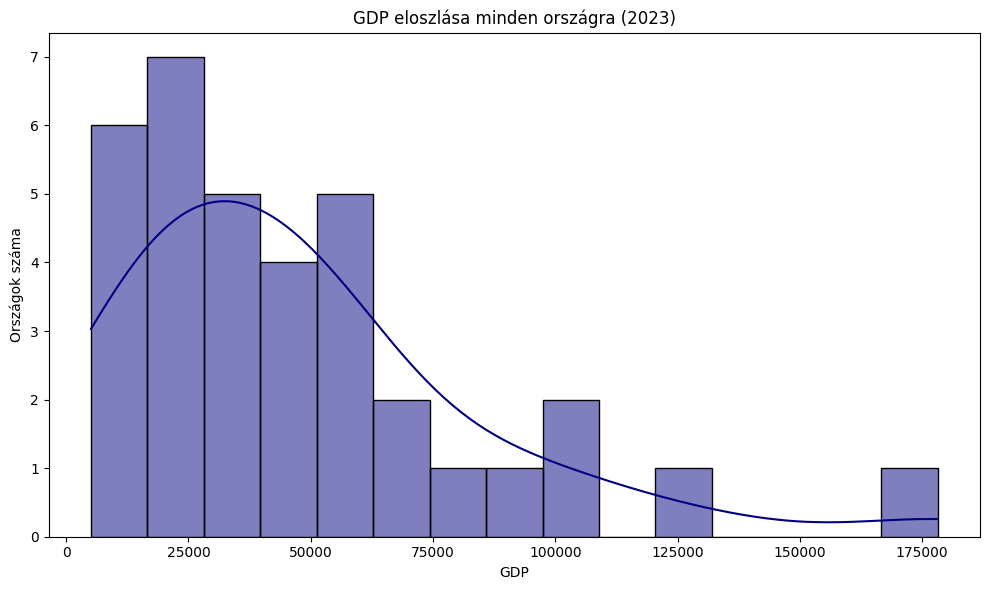

In [ ]:
ev = 2023

gdp_ev = df_melted[df_melted['Év'] == ev]['GDP'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(gdp_ev, bins=15, kde=True, color='navy')
plt.title(f'GDP eloszlása minden országra ({ev})')
plt.xlabel('GDP')
plt.ylabel('Országok száma')
plt.tight_layout()
plt.show()

Ez a kódrészlet a 2000-es és 2023-as év közötti GDP növekedést ábrázolja országonként, ahol a növekedés a két év közötti különbséget mutatja, és egy oszlopdiagramot készít a legnagyobb növekedést elérő országok rangsorával.

<ipython-input-25-79795baf65e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_growth['növekedés'], y=df_growth.index, palette='coolwarm')


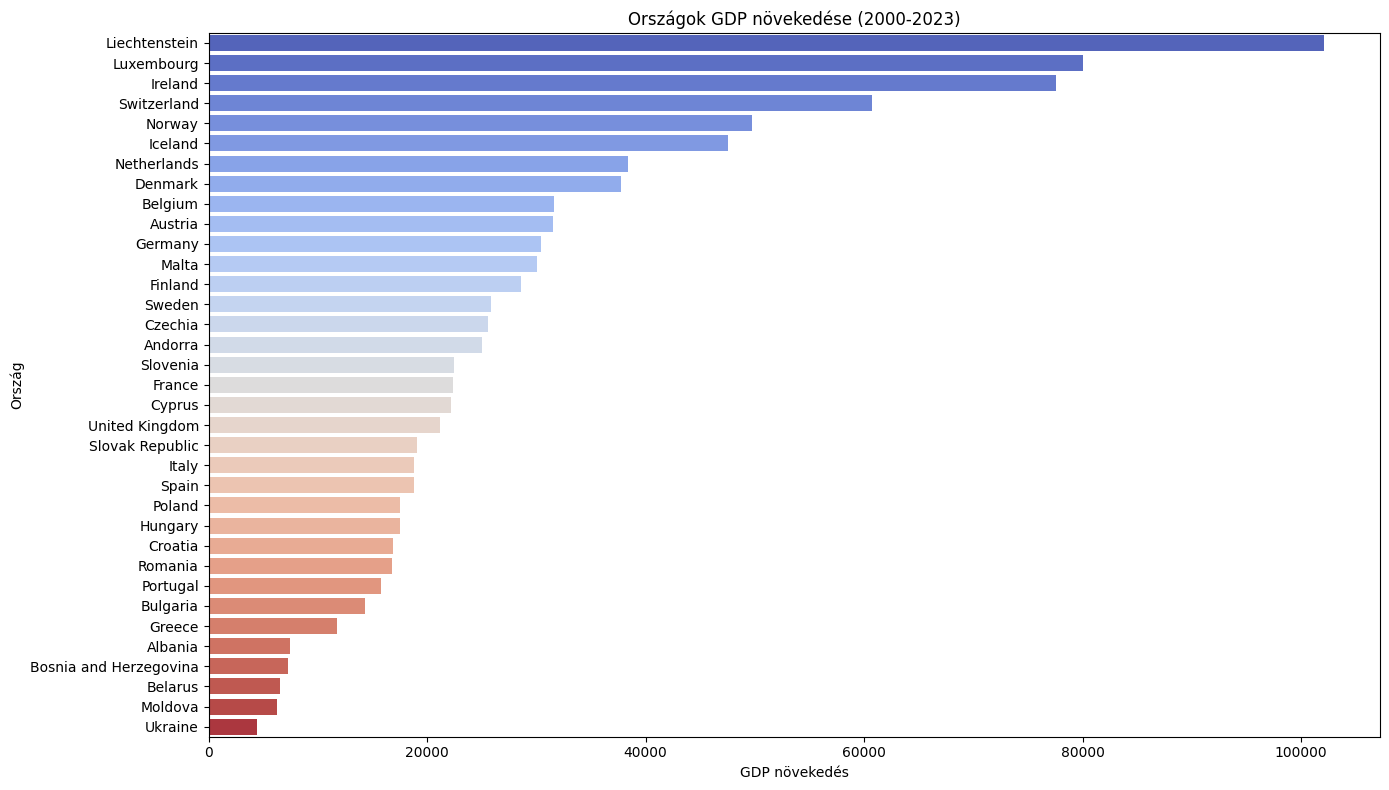

In [ ]:
ev1 = 2000
ev2 = 2023

gdp_2000 = df_melted[df_melted['Év'] == ev1][['Ország', 'GDP']].set_index('Ország')
gdp_2020 = df_melted[df_melted['Év'] == ev2][['Ország', 'GDP']].set_index('Ország')

df_growth = pd.DataFrame({
    ev1: gdp_2000['GDP'],
    ev2: gdp_2020['GDP']
}).dropna()

df_growth['növekedés'] = df_growth[ev2] - df_growth[ev1]
df_growth = df_growth.sort_values('növekedés', ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(x=df_growth['növekedés'], y=df_growth.index, palette='coolwarm')
plt.title(f'Országok GDP növekedése ({ev1}-{ev2})')
plt.xlabel('GDP növekedés')
plt.ylabel('Ország')
plt.tight_layout()
plt.show()

Ez a kódrészlet az országok átlagos GDP-jét ábrázolja, és a legnagyobb átlagos GDP-vel rendelkező top 10 országot mutatja egy oszlopdiagramon.

<ipython-input-26-eb6133a904fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atlag_gdp.values, y=atlag_gdp.index, palette='mako')


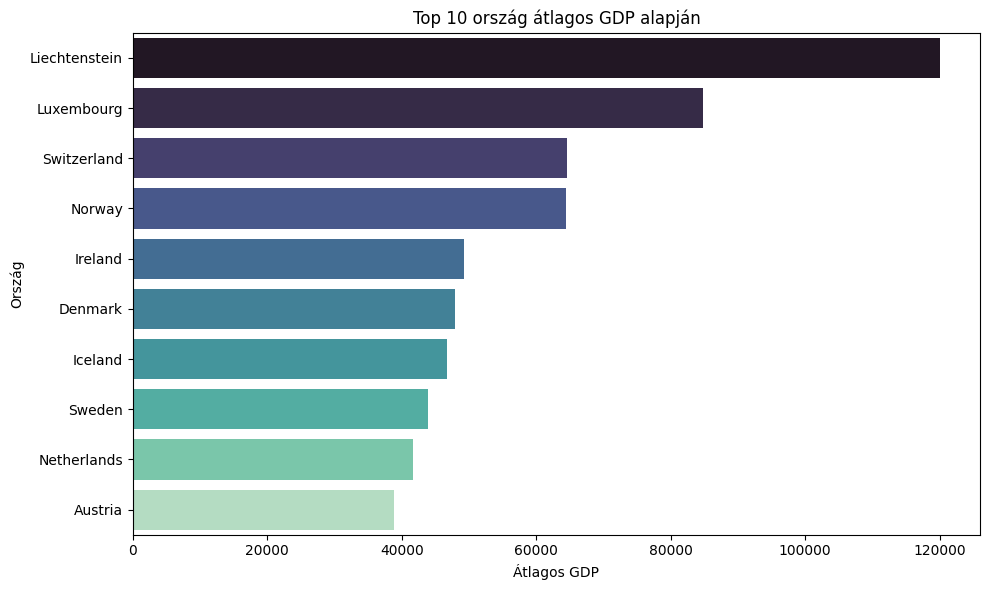

In [ ]:
atlag_gdp = df_melted.groupby('Ország')['GDP'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=atlag_gdp.values, y=atlag_gdp.index, palette='mako')
plt.title('Top 10 ország átlagos GDP alapján')
plt.xlabel('Átlagos GDP')
plt.ylabel('Ország')
plt.tight_layout()
plt.show()

Ez a kódrészlet egy hőtérképet (heatmap) ábrázol, amely megmutatja a GDP változását országok és évek szerint, színskála segítségével, ahol a sötétebb árnyalatok magasabb GDP értékeket jelentenek.

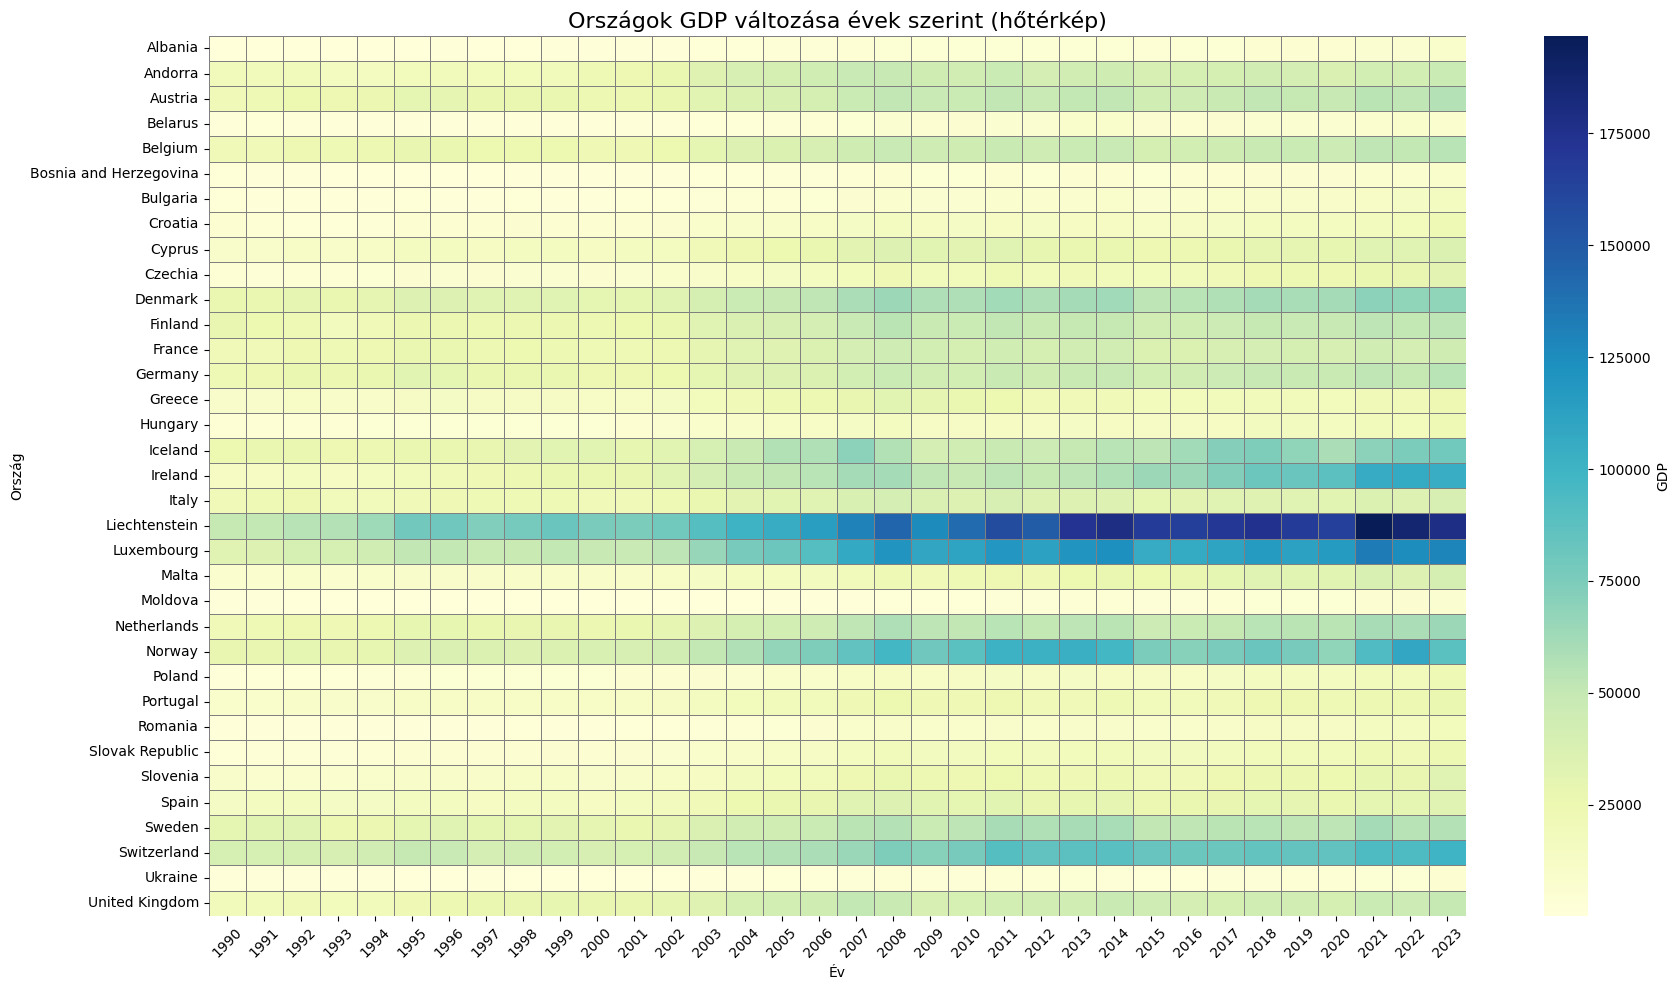

In [ ]:
pivot_table = df_melted.pivot(index='Ország', columns='Év', values='GDP')
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'GDP'})
plt.title('Országok GDP változása évek szerint (hőtérkép)', fontsize=16)
plt.xlabel('Év')
plt.ylabel('Ország')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Ez a kódrészlet egy buborék diagramot készít, amely a GDP változását mutatja országonként és évenként. A buborékok mérete az egyes országok GDP-jének nagyságát, míg a színük a GDP értéket jelzi, így vizuálisan könnyen összehasonlíthatók az országok gazdasági teljesítményei különböző években.

<ipython-input-28-7424e3d61ad9>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='GDP', loc='upper right')


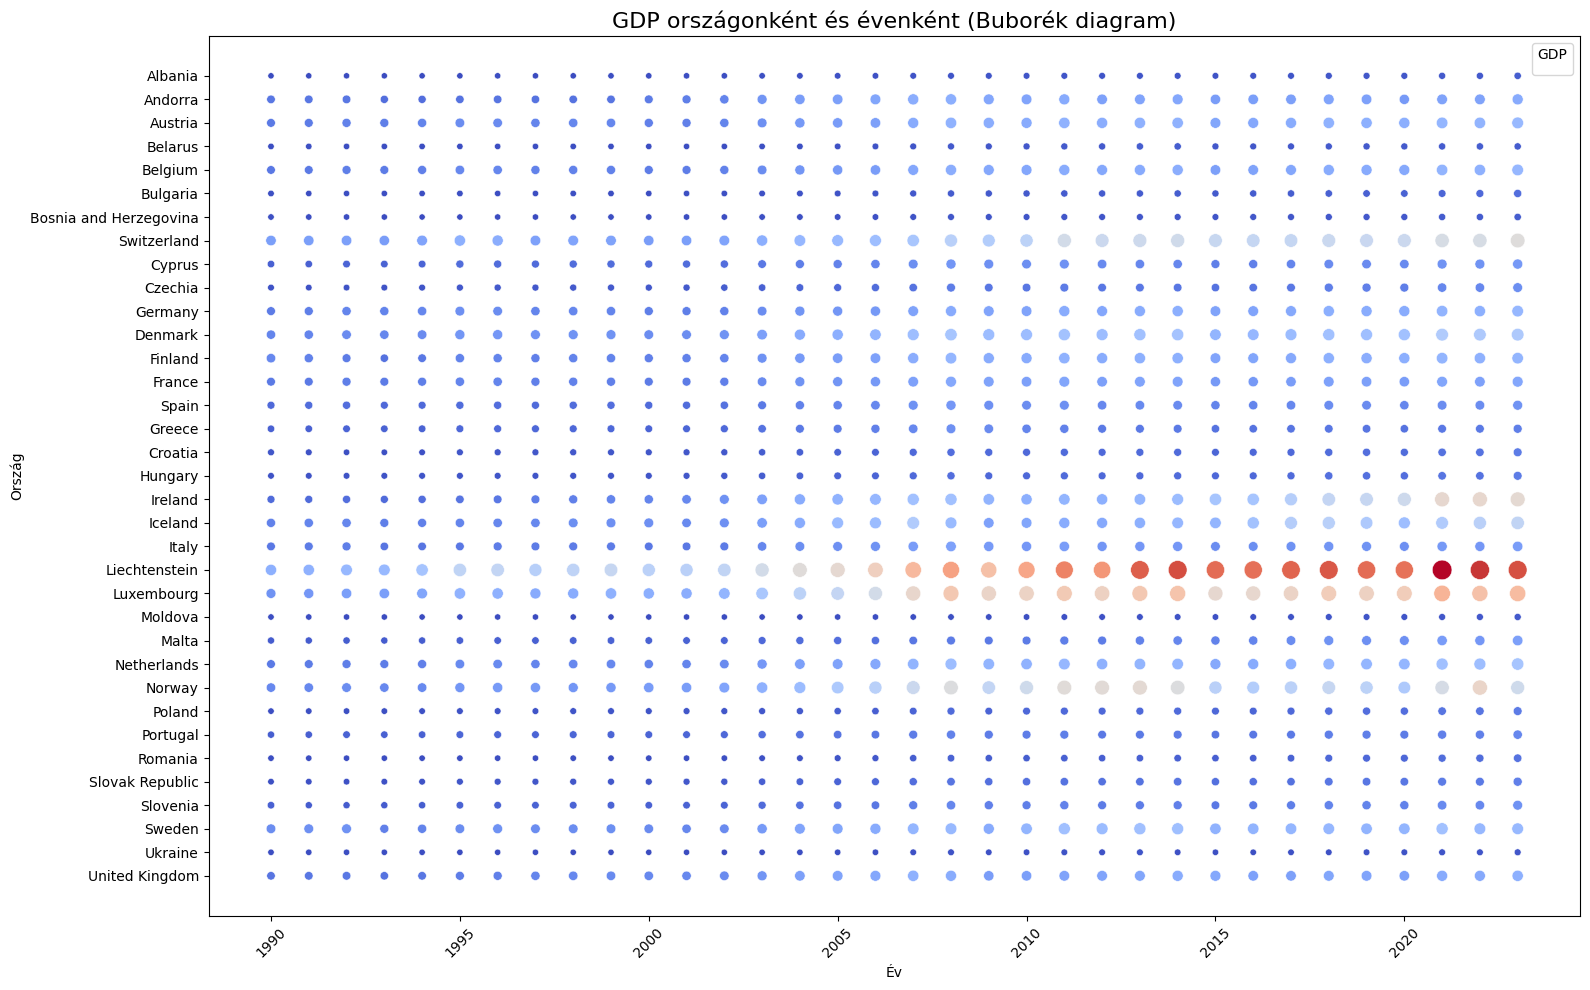

In [ ]:
plt.figure(figsize=(16, 10))
bubble_size = df_melted['GDP'] / 1000000000
sns.scatterplot(data=df_melted, x='Év', y='Ország', size=bubble_size, hue='GDP', palette='coolwarm', sizes=(20, 200), legend=False)
plt.title('GDP országonként és évenként (Buborék diagram)', fontsize=16)
plt.xlabel('Év')
plt.ylabel('Ország')
plt.legend(title='GDP', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A sns.boxplot(data=df_melted, x='Év', y='GDP') kód nem országonként, hanem évenként mutatja a GDP eloszlását.Ez azt jelenti, hogy:
az X-tengelyen az évek szerepelnek (pl. 2000, 2001, ..., 2023),
az Y-tengelyen pedig az összes ország GDP-je az adott évben,
tehát minden évhez tartozik egy doboz, ami az összes ország GDP-értékeinek eloszlását mutatja abban az évben.

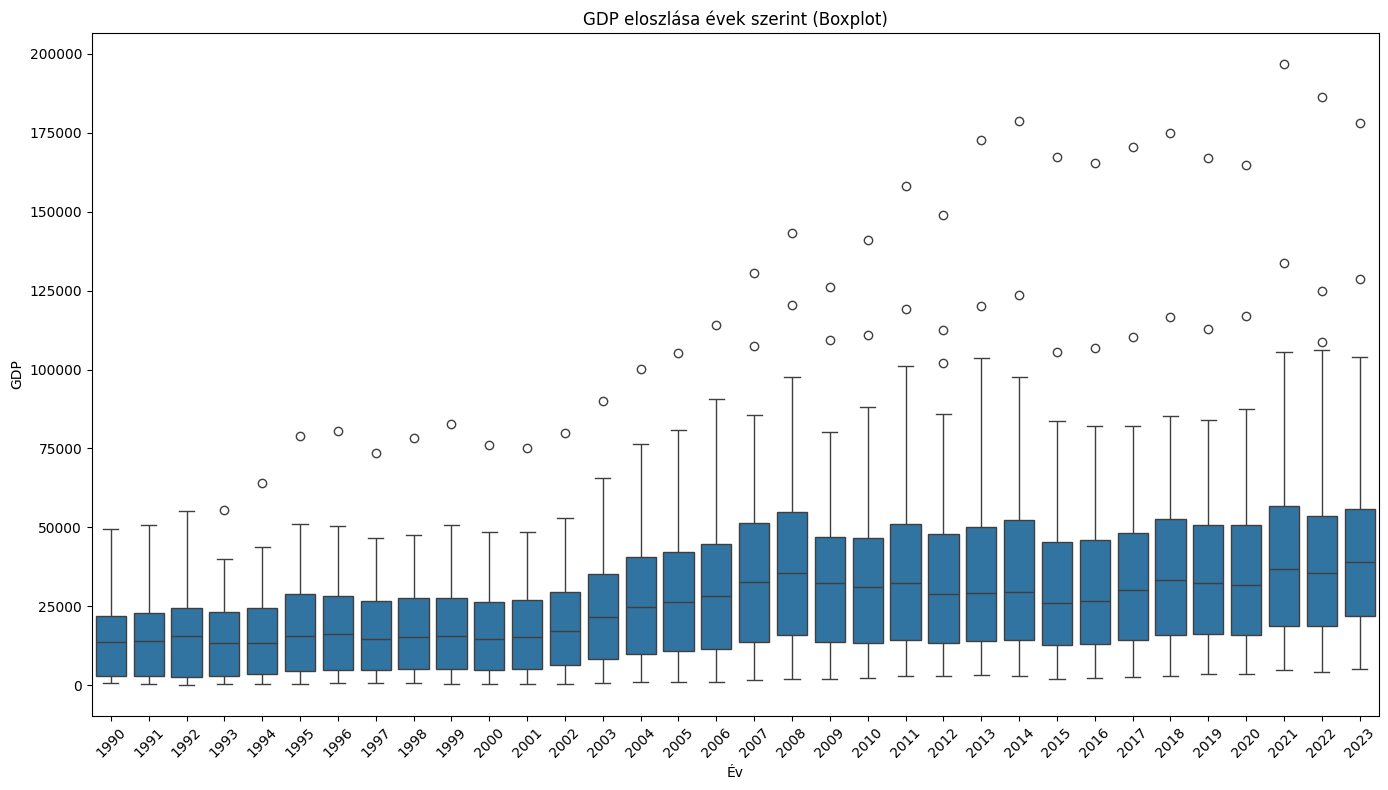

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_melted, x='Év', y='GDP')
plt.title('GDP eloszlása évek szerint (Boxplot)')
plt.xlabel('Év')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

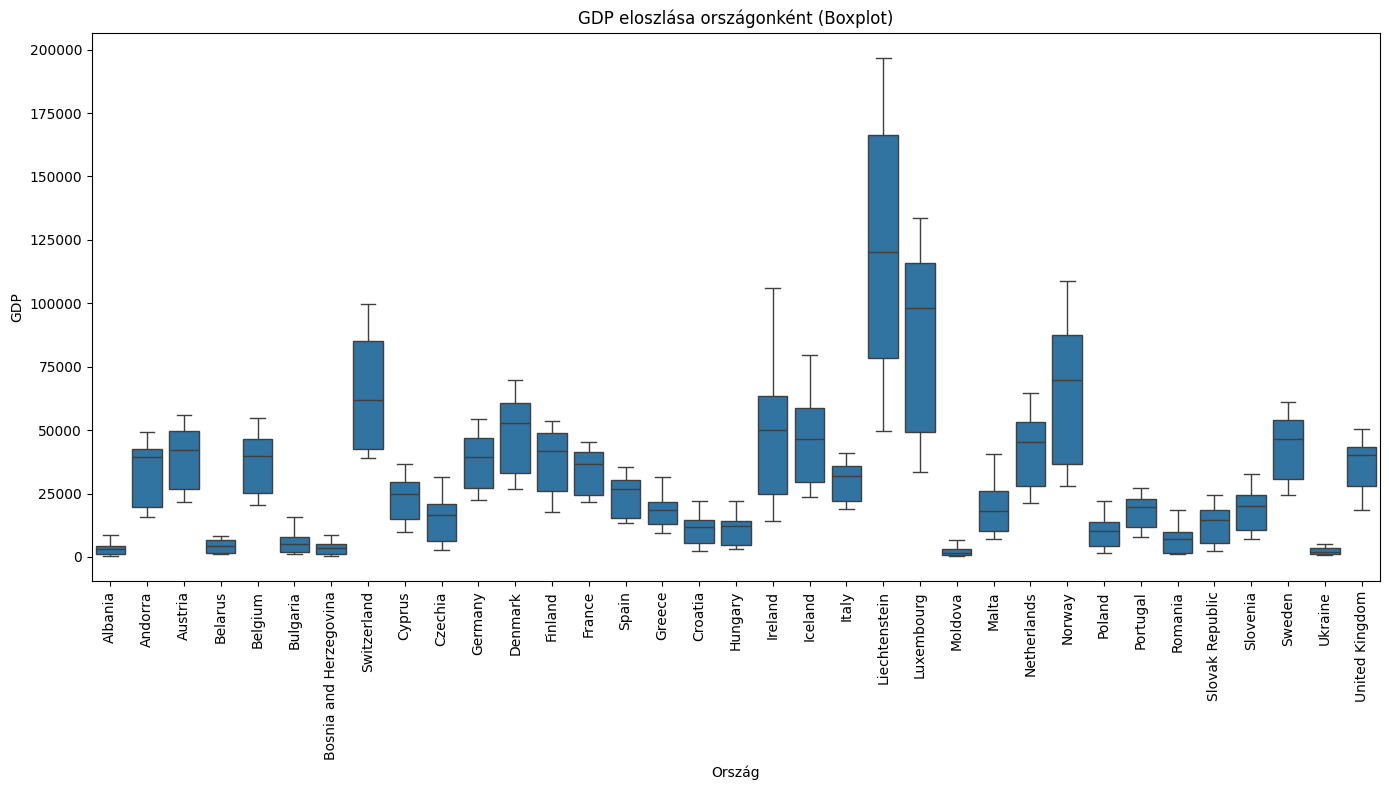

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_melted, x='Ország', y='GDP')
plt.title('GDP eloszlása országonként (Boxplot)')
plt.xlabel('Ország')
plt.ylabel('GDP')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


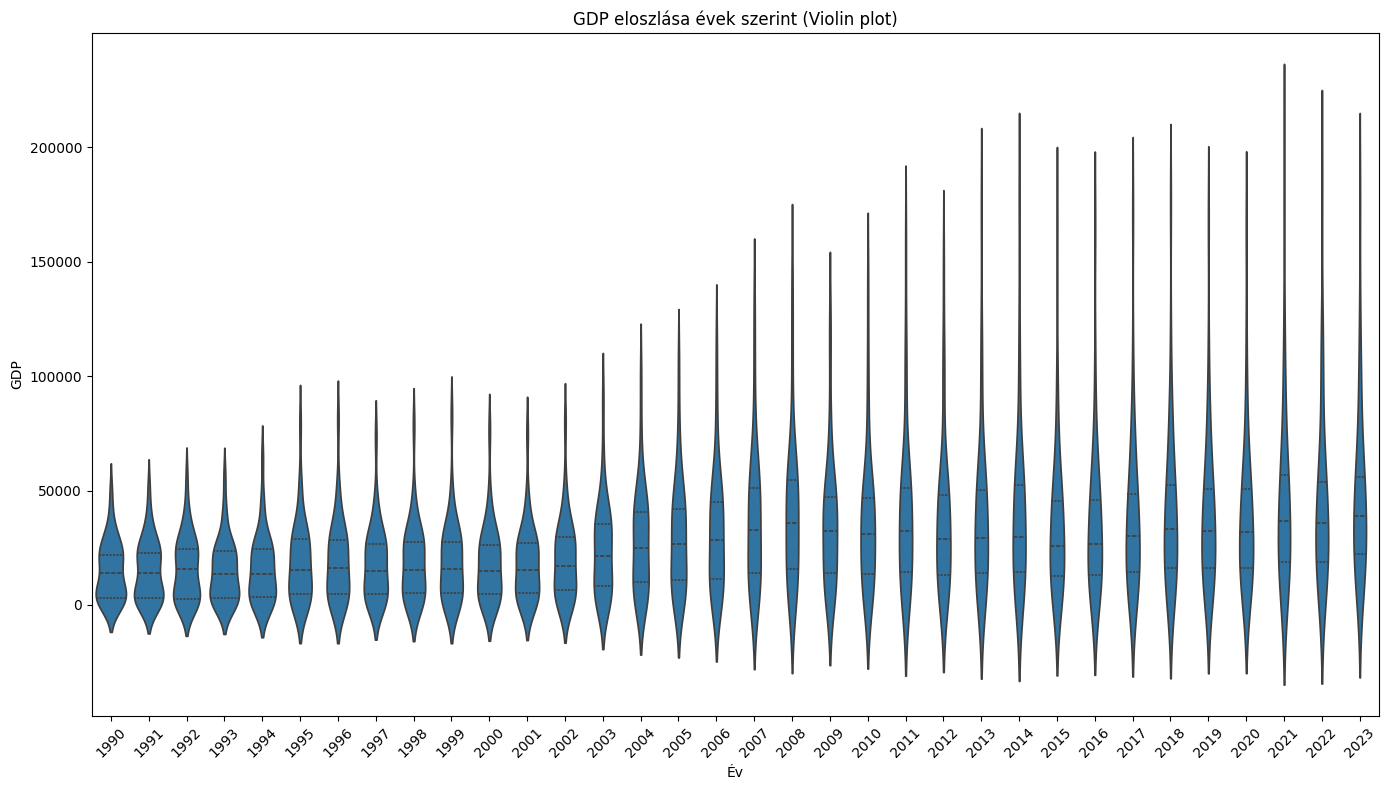

In [ ]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df_melted, x='Év', y='GDP', inner='quartile')
plt.title('GDP eloszlása évek szerint (Violin plot)')
plt.xlabel('Év')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Az országokat a Z-tengelyen különíti el,
az évek mentén látod a változást,
a buborék mérete vagy színe mutathatja a GDP mértékét. Pontdiagramm

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df_melted,
    x='Év',
    y='GDP',
    z='Ország',
    color='Ország',
    size='GDP',
    title='3D GDP ábra: Év - GDP - Ország',
    opacity=0.7
)

fig.update_layout(scene=dict(
    xaxis_title='Év',
    yaxis_title='GDP',
    zaxis_title='Ország'
))
fig.show()

In [ ]:
pivot = df_melted.pivot(index='Ország', columns='Év', values='GDP')
fig = go.Figure(data=[go.Surface(z=pivot.values, x=pivot.columns, y=pivot.index)])
fig.update_layout(
    title='3D GDP Surface Plot',
    scene=dict(
        xaxis_title='Év',
        yaxis_title='Ország',
        zaxis_title='GDP'
    )
)
fig.show()